In [1]:
from google.colab import files
uploaded = files.upload()

Saving car details v4.csv to car details v4.csv


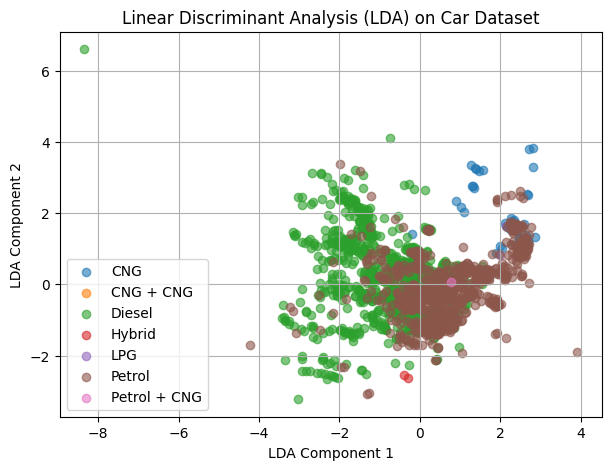

Explained Variance Ratio (LDA): [0.78769272 0.1653499 ]


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

# --- Load dataset ---
data = pd.read_csv("car details v4.csv")
data.columns = data.columns.str.strip().str.lower()

# --- Select numeric features and class label ---
numeric_cols = ['price', 'year', 'kilometer', 'length', 'width', 'height',
                'seating capacity', 'fuel tank capacity']
target_col = 'fuel type'

# Drop missing values
X = data[numeric_cols].dropna()
y = data.loc[X.index, target_col].dropna()

# Encode class labels (convert strings to integers)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# --- Standardize data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Apply Linear Discriminant Analysis ---
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y_encoded)

# --- Plot LDA projection ---
plt.figure(figsize=(7,5))
for label in np.unique(y_encoded):
    plt.scatter(X_lda[y_encoded == label, 0],
                X_lda[y_encoded == label, 1],
                label=le.inverse_transform([label])[0], alpha=0.6)
plt.title("Linear Discriminant Analysis (LDA) on Car Dataset")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.legend()
plt.grid(True)
plt.show()

# --- Print explained variance ratio ---
print("Explained Variance Ratio (LDA):", lda.explained_variance_ratio_)
